# Particle Geodesics

In [1]:
Needs["xAct`xCoba`", FileNameJoin[{Environment["GENERATO"], "src/Generato.wl"}]];

------------------------------------------------------------
Package xAct`xPerm`  version 1.2.3, {2015, 8, 23}
CopyRight (C) 2003-2020, Jose M. Martin-Garcia, under the General Public\
 
>   License.
Connecting to external mac executable...
Connection established.
------------------------------------------------------------
Package xAct`xTensor`  version 1.2.0, {2021, 10, 17}
CopyRight (C) 2002-2021, Jose M. Martin-Garcia, under the General Public\
 
>   License.
------------------------------------------------------------
These packages come with ABSOLUTELY NO WARRANTY; for details type\
 
>   Disclaimer[]. This is free software, and you are welcome to redistribute\
 
>   it under certain conditions. See the General Public License for details.
------------------------------------------------------------
------------------------------------------------------------
Package xAct`xCoba`  version 0.8.6, {2021, 2, 28}
CopyRight (C) 2005-2021, David Yllanes and Jose M. Martin-Garcia, under t

In [2]:
(* set mode to check equations *)
SetCheckInputEquations[True];

In [4]:
DefManifold[M3, 3, IndexRange[a, z]];

In [5]:
DefChart[cart, M3, {1, 2, 3}, {X[], Y[], Z[]}, ChartColor -> Blue];

#### Define Variables and Equations

In [6]:
<<"wl/Geod_var.wl"

In [7]:
<<"wl/Geod_rhs.wl"

In [8]:
Module[{Mat, invMat},
  Mat = Table[gam[{ii, -cart}, {jj, -cart}] // ToValues, {ii, 1, 3}, {jj, 1, 3}];
  invMat = Inverse[Mat] /. {1 / Det[Mat] -> detinvgam};
  SetEQNDelayed[detinvgam[], 1 / Det[Mat] // Simplify];
  SetEQNDelayed[invgam[i_, j_], invMat[[i[[1]], j[[1]]]] // Simplify]
];

## Check Expressions

In [9]:
rhsof[var_] := Module[{}, var /. {var[[0]] :> RHSOf[ToString[var[[0]]]]}];
eqssof[varlist_] := Module[{var}, 
   Table[var = varlist[[ivar]][[1]]; var == rhsof[var]//ScreenDollarIndices, {ivar, 1, Length[varlist]}]];

## Intermediate Variables

-Image-
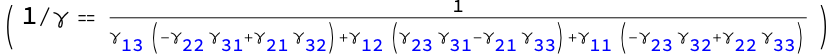

In [11]:
eqssof[TempVarlist[[1;;1]]] // MatrixForm // Rasterize

-Image-
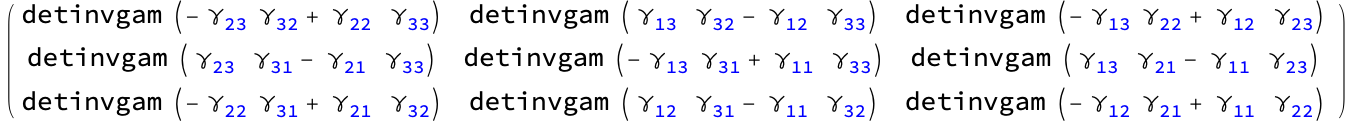

In [12]:
Table[invgam$RHS[{ii, cart}, {jj, cart}] // ToValues, {ii, 1, 3}, {jj, 1, 3}] // MatrixForm // Rasterize

-Image-
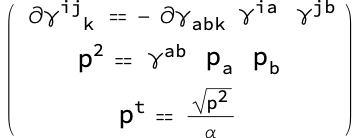

In [13]:
eqssof[TempVarlist[[3;;-1]]] // MatrixForm // Rasterize

-Image-
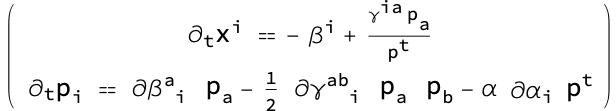

In [14]:
eqssof[dtParticleVarlist] // MatrixForm // Rasterize